In [1]:
import billboard
import pandas as pd
from datetime import date, datetime, timedelta

In [2]:
help(billboard)

Help on module billboard:

NAME
    billboard

CLASSES
    builtins.Exception(builtins.BaseException)
        BillboardNotFoundException
        BillboardParseException
    builtins.UserWarning(builtins.Warning)
        UnsupportedYearWarning
    builtins.object
        ChartData
        ChartEntry
            YearEndChartEntry
    
    class BillboardNotFoundException(builtins.Exception)
     |  Method resolution order:
     |      BillboardNotFoundException
     |      builtins.Exception
     |      builtins.BaseException
     |      builtins.object
     |  
     |  Data descriptors defined here:
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
     |  
     |  ----------------------------------------------------------------------
     |  Methods inherited from builtins.Exception:
     |  
     |  __init__(self, /, *args, **kwargs)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  -------------------

In [3]:
chart = billboard.ChartData('hot-100')

In [4]:
chart.date

'2023-04-22'

In [5]:
chart.entries

[billboard.ChartEntry(title='Last Night', artist='Morgan Wallen'),
 billboard.ChartEntry(title='Search & Rescue', artist='Drake'),
 billboard.ChartEntry(title='Flowers', artist='Miley Cyrus'),
 billboard.ChartEntry(title='Kill Bill', artist='SZA'),
 billboard.ChartEntry(title="Creepin'", artist='Metro Boomin, The Weeknd & 21 Savage'),
 billboard.ChartEntry(title='Calm Down', artist='Rema & Selena Gomez'),
 billboard.ChartEntry(title='Die For You', artist='The Weeknd & Ariana Grande'),
 billboard.ChartEntry(title="Boy's A Liar, Pt. 2", artist='PinkPantheress & Ice Spice'),
 billboard.ChartEntry(title='Anti-Hero', artist='Taylor Swift'),
 billboard.ChartEntry(title='Ella Baila Sola', artist='Eslabon Armado X Peso Pluma'),
 billboard.ChartEntry(title='Rock And A Hard Place', artist='Bailey Zimmerman'),
 billboard.ChartEntry(title='Players', artist='Coi Leray'),
 billboard.ChartEntry(title='You Proof', artist='Morgan Wallen'),
 billboard.ChartEntry(title='Favorite Song', artist='Toosii'),


In [6]:
chart.entries[3].rank

4

In [7]:
for i in chart:
    print(i, i.rank, i.weeks)

'Last Night' by Morgan Wallen 1 11
'Search & Rescue' by Drake 2 1
'Flowers' by Miley Cyrus 3 13
'Kill Bill' by SZA 4 18
'Creepin'' by Metro Boomin, The Weeknd & 21 Savage 5 19
'Calm Down' by Rema & Selena Gomez 6 32
'Die For You' by The Weeknd & Ariana Grande 7 37
'Boy's A Liar, Pt. 2' by PinkPantheress & Ice Spice 8 10
'Anti-Hero' by Taylor Swift 9 25
'Ella Baila Sola' by Eslabon Armado X Peso Pluma 10 4
'Rock And A Hard Place' by Bailey Zimmerman 11 44
'Players' by Coi Leray 12 15
'You Proof' by Morgan Wallen 13 48
'Favorite Song' by Toosii 14 8
'Sure Thing' by Miguel 15 37
'Lavender Haze' by Taylor Swift 16 25
'La Bebe' by Yng Lvcas x Peso Pluma 17 4
'As It Was' by Harry Styles 18 54
'Thought You Should Know' by Morgan Wallen 19 35
'Thinkin' Bout Me' by Morgan Wallen 20 6
'I'm Good (Blue)' by David Guetta & Bebe Rexha 21 33
'One Thing At A Time' by Morgan Wallen 22 19
'Fast Car' by Luke Combs 23 3
'Under The Influence' by Chris Brown 24 31
'Something In The Orange' by Zach Bryan 25 

In [8]:
song = chart[0]
help(song)

Help on ChartEntry in module billboard object:

class ChartEntry(builtins.object)
 |  ChartEntry(title, artist, image, peakPos, lastPos, weeks, rank, isNew)
 |  
 |  Represents an entry (typically a single track) on a chart.
 |  
 |  Attributes:
 |      title: The title of the track.
 |      artist: The name of the track artist, as formatted on Billboard.com.
 |          If there are multiple artists and/or featured artists, they will
 |          be included in this string.
 |      image: The URL of the image for the track.
 |      peakPos: The track's peak position on the chart as of the chart date,
 |          as an int (or None if the chart does not include this information).
 |      lastPos: The track's position on the previous week's chart, as an int
 |          (or None if the chart does not include this information).
 |          This value is 0 if the track was not on the previous week's chart.
 |      weeks: The number of weeks the track has been or was on the chart,
 |        

In [9]:
df = pd.read_csv('data/tracks.csv', parse_dates=['release_date'])

In [10]:
# Conseguindo o valor da música mais nova no dataset de features
last_song_date = df['release_date'].max().date()
last_song_date

datetime.date(2021, 4, 16)

In [11]:
df.loc[df['popularity'] == df['popularity'].max()].artists

93802    ['Justin Bieber', 'Daniel Caesar', 'Giveon']
Name: artists, dtype: object

In [25]:
entries = pd.read_csv('data/billboard_hot_100.csv')

In [26]:
### Juntar todos os dataframes e calcular os pontos pra poder unir com o dataset de features
entries

,name,artist,rank,weeks,date
0,All I Want For Christmas Is You,Mariah Carey,1,50,2022-01-01
1,Rockin' Around The Christmas Tree,Brenda Lee,2,44,2022-01-01
2,Jingle Bell Rock,Bobby Helms,3,41,2022-01-01
3,A Holly Jolly Christmas,Burl Ives,4,25,2022-01-01
4,Easy On Me,Adele,5,11,2022-01-01
...,...,...,...,...,...
330882,Down In Virginia,Jimmy Reed,96,1,1958-08-09
330883,Sunday Barbecue,Tennessee Ernie Ford,97,1,1958-08-09
330884,Gotta Have Rain,Eydie Gorme,98,2,1958-08-09
330885,Nothing In The World,Nat King Cole,99,1,1958-08-09


In [27]:
# Agrupando as músicas que aparecem mais somando sua pontuação
sanitized_entries = entries.groupby(['name', 'artist'], as_index=False)['weeks'].agg('max').sort_values('weeks', ascending=False).reset_index(drop=True)
sanitized_entries

,name,artist,weeks
0,Blinding Lights,The Weeknd,90
1,Radioactive,Imagine Dragons,87
2,Sail,AWOLNATION,79
3,I'm Yours,Jason Mraz,76
4,How Do I Live,LeAnn Rimes,69
...,...,...,...
29760,One,Mary J. Blige,1
29761,The Magic Of Our Summer Love,The Tymes,1
29762,Same Thing,Lil Baby,1
29763,I'm Coming Home,Paul Anka,1


In [28]:
sanitized_entries.dtypes

name      object
artist    object
weeks      int64
dtype: object

In [29]:
import seaborn as sns

<AxesSubplot:xlabel='weeks', ylabel='Count'>

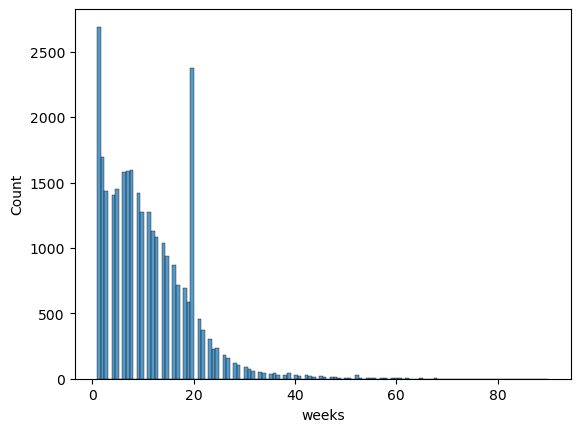

In [31]:
sns.histplot(data=sanitized_entries, x='weeks')

In [32]:
# Pelo gráfico é possível observar que a mediana é uma medida de centralização muito melhor 
# que a média neste caso.
sanitized_entries['weeks'].median()

10.0

In [33]:
# Coluna de artistas é uma string e não uma lista de strings
df.dtypes

id                          object
name                        object
popularity                   int64
duration_ms                  int64
explicit                     int64
artists                     object
id_artists                  object
release_date        datetime64[ns]
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature               int64
artist                      object
dtype: object

In [34]:
# Tratando a string como lista
from ast import literal_eval
df['artist'] = df['artists'].apply(lambda x: literal_eval(x)[0])

In [35]:

df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,Uli
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,Fernando Pessoa
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,Ignacio Corsini
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,Ignacio Corsini
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,Dick Haymes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,阿YueYue
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,ROLE MODEL
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,FINNEAS
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,Gentle Bones


In [68]:
# Por alguma razão, algumas músicas aparecem repetidas diversas vezes, portanto é necessario filtra-las
merged_df = pd.merge(df, sanitized_entries, how='left', on=['name', 'artist']).drop(columns=['id', 'artists', 'id_artists', 'popularity','mode', 'key','time_signature']).drop_duplicates(['name', 'artist'], keep='first').reset_index(drop=True)
merged_df

,name,duration_ms,explicit,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks
0,Carve,126903,0,1922-02-22,0.645,0.4450,-13.338,0.4510,0.674,0.744000,0.1510,0.1270,104.851,Uli,NaN
1,Capítulo 2.16 - Banquero Anarquista,98200,0,1922-06-01,0.695,0.2630,-22.136,0.9570,0.797,0.000000,0.1480,0.6550,102.009,Fernando Pessoa,NaN
2,Vivo para Quererte - Remasterizado,181640,0,1922-03-21,0.434,0.1770,-21.180,0.0512,0.994,0.021800,0.2120,0.4570,130.418,Ignacio Corsini,NaN
3,El Prisionero - Remasterizado,176907,0,1922-03-21,0.321,0.0946,-27.961,0.0504,0.995,0.918000,0.1040,0.3970,169.980,Ignacio Corsini,NaN
4,Lady of the Evening,163080,0,1922-01-01,0.402,0.1580,-16.900,0.0390,0.989,0.130000,0.3110,0.1960,103.220,Dick Haymes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523461,Skyscraper,106002,0,2020-02-08,0.626,0.5300,-13.117,0.0284,0.113,0.856000,0.1040,0.2150,120.113,Emilie Chin,NaN
523462,云与海,258267,0,2020-09-26,0.560,0.5180,-7.471,0.0292,0.785,0.000000,0.0648,0.2110,131.896,阿YueYue,NaN
523463,blind,153293,0,2020-10-21,0.765,0.6630,-5.223,0.0652,0.141,0.000297,0.0924,0.6860,150.091,ROLE MODEL,NaN
523464,What They'll Say About Us,187601,0,2020-09-02,0.535,0.3140,-12.823,0.0408,0.895,0.000150,0.0874,0.0663,145.095,FINNEAS,NaN


In [58]:
billboard_entries_df = merged_df[~merged_df['weeks'].isna()].reset_index(drop=True)
billboard_entries_df

,name,duration_ms,explicit,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks
0,White Christmas,177480,0,1942-01-01,0.317,0.158,-16.485,0.0381,0.67300,0.353000,0.3380,0.247,130.503,Bing Crosby,24.0
1,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.373,-12.990,0.0932,0.44600,0.000011,0.1030,0.493,79.855,Bill Withers,16.0
2,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.224,-12.431,0.0935,0.64600,0.000000,0.2840,0.620,202.481,Bing Crosby,1.0
3,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.146,-16.084,0.0321,0.28100,0.000000,0.2560,0.176,84.041,Bing Crosby,1.0
4,The Children's Marching Song (Nick Nack Paddy ...,166867,0,1950-01-01,0.712,0.856,-9.457,0.0332,0.63600,0.000000,0.1680,0.934,97.431,Mitch Miller,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10038,I Love It,156773,0,2012-01-01,0.710,0.901,-2.686,0.0296,0.00828,0.000013,0.1720,0.860,125.953,Icona Pop,29.0
10039,Ricky,154693,0,1988-10-18,0.525,0.668,-12.278,0.0920,0.06270,0.000000,0.4430,0.973,153.811,"""Weird Al"" Yankovic",8.0
10040,Love At First Sight,276440,0,1990-01-01,0.620,0.608,-8.665,0.0294,0.31800,0.000000,0.0809,0.566,115.826,Styx,16.0
10041,Waiting For Love,278173,0,1990-01-01,0.615,0.537,-10.728,0.0282,0.27800,0.000000,0.1640,0.494,111.581,Alias,17.0


In [59]:
total_in_billboard = len(billboard_entries_df)
total_in_billboard

10043

In [60]:
sanitized_merged_df = merged_df[merged_df['weeks'].isna()].reset_index(drop=True)
sanitized_merged_df

,name,duration_ms,explicit,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks
0,Carve,126903,0,1922-02-22,0.645,0.4450,-13.338,0.4510,0.674,0.744000,0.1510,0.1270,104.851,Uli,NaN
1,Capítulo 2.16 - Banquero Anarquista,98200,0,1922-06-01,0.695,0.2630,-22.136,0.9570,0.797,0.000000,0.1480,0.6550,102.009,Fernando Pessoa,NaN
2,Vivo para Quererte - Remasterizado,181640,0,1922-03-21,0.434,0.1770,-21.180,0.0512,0.994,0.021800,0.2120,0.4570,130.418,Ignacio Corsini,NaN
3,El Prisionero - Remasterizado,176907,0,1922-03-21,0.321,0.0946,-27.961,0.0504,0.995,0.918000,0.1040,0.3970,169.980,Ignacio Corsini,NaN
4,Lady of the Evening,163080,0,1922-01-01,0.402,0.1580,-16.900,0.0390,0.989,0.130000,0.3110,0.1960,103.220,Dick Haymes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513418,Skyscraper,106002,0,2020-02-08,0.626,0.5300,-13.117,0.0284,0.113,0.856000,0.1040,0.2150,120.113,Emilie Chin,NaN
513419,云与海,258267,0,2020-09-26,0.560,0.5180,-7.471,0.0292,0.785,0.000000,0.0648,0.2110,131.896,阿YueYue,NaN
513420,blind,153293,0,2020-10-21,0.765,0.6630,-5.223,0.0652,0.141,0.000297,0.0924,0.6860,150.091,ROLE MODEL,NaN
513421,What They'll Say About Us,187601,0,2020-09-02,0.535,0.3140,-12.823,0.0408,0.895,0.000150,0.0874,0.0663,145.095,FINNEAS,NaN


In [61]:
samples_df = sanitized_merged_df.sample(n=total_in_billboard)
samples_df

,name,duration_ms,explicit,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks
456287,Awara,382839,0,1983-06-03,0.546,0.5680,-7.910,0.0294,0.914,0.061400,0.1190,0.613,86.473,Hariharan,NaN
296678,Lille Laila,192600,0,1984-05-30,0.572,0.4890,-12.653,0.0249,0.653,0.000000,0.0415,0.927,92.987,De Syngende Husmødre,NaN
416954,Paraíso Terrenal,113940,0,1963-01-01,0.712,0.7640,-5.014,0.2980,0.310,0.000028,0.0666,0.897,121.955,Duo Rey Silva,NaN
316326,Downhearted Aka How Blue Can You Get?,195000,0,1962-01-01,0.655,0.3990,-9.438,0.0356,0.493,0.000000,0.1080,0.589,108.151,B.B. King,NaN
187629,La Changa,325271,0,1974-01-01,0.611,0.4990,-14.821,0.0809,0.857,0.449000,0.0702,0.808,106.659,Orquesta Dicupé,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210294,The Wildest Gal In Town,157573,0,1958-01-01,0.460,0.0663,-26.167,0.0887,0.862,0.000000,0.8040,0.318,109.610,Anita O'Day,NaN
81861,Savage Remix (feat. Beyoncé),242001,1,2020-04-29,0.822,0.7430,-4.772,0.2800,0.016,0.000000,0.1270,0.636,84.459,Megan Thee Stallion,NaN
497187,"Cuda świata - z filmu ""Nowe szaty króla""",141307,0,2011-01-01,0.523,0.8600,-6.369,0.2600,0.409,0.000000,0.3450,0.563,107.262,Krzysztof Krawczyk,NaN
440318,As strößolot,219200,0,1977-01-01,0.781,0.2930,-15.543,0.0406,0.142,0.000000,0.1880,0.631,97.637,Stemmeisen und Zündschnur,NaN


In [67]:
concatened_df = pd.concat([billboard_entries_df, samples_df]).reset_index(drop=True)
concatened_df

,name,duration_ms,explicit,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks
0,White Christmas,177480,0,1942-01-01,0.317,0.1580,-16.485,0.0381,0.673,0.353000,0.338,0.247,130.503,Bing Crosby,24.0
1,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.3730,-12.990,0.0932,0.446,0.000011,0.103,0.493,79.855,Bill Withers,16.0
2,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.2240,-12.431,0.0935,0.646,0.000000,0.284,0.620,202.481,Bing Crosby,1.0
3,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.1460,-16.084,0.0321,0.281,0.000000,0.256,0.176,84.041,Bing Crosby,1.0
4,The Children's Marching Song (Nick Nack Paddy ...,166867,0,1950-01-01,0.712,0.8560,-9.457,0.0332,0.636,0.000000,0.168,0.934,97.431,Mitch Miller,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,The Wildest Gal In Town,157573,0,1958-01-01,0.460,0.0663,-26.167,0.0887,0.862,0.000000,0.804,0.318,109.610,Anita O'Day,NaN
20082,Savage Remix (feat. Beyoncé),242001,1,2020-04-29,0.822,0.7430,-4.772,0.2800,0.016,0.000000,0.127,0.636,84.459,Megan Thee Stallion,NaN
20083,"Cuda świata - z filmu ""Nowe szaty króla""",141307,0,2011-01-01,0.523,0.8600,-6.369,0.2600,0.409,0.000000,0.345,0.563,107.262,Krzysztof Krawczyk,NaN
20084,As strößolot,219200,0,1977-01-01,0.781,0.2930,-15.543,0.0406,0.142,0.000000,0.188,0.631,97.637,Stemmeisen und Zündschnur,NaN


In [ ]:
# Drop duplicate rows based on artist and name columns
merged_df.drop_duplicates(subset=['artist', 'name_left'], keep='first', inplace=True)

In [ ]:
# Drop the right name column
merged_df.drop('name_right', axis=1, inplace=True)

### To-do:
- Aplicação de modelos e validação cruzada